## Regressão Linear Múltipla

Análise e modelagem dos dados de flores do *dataset* "iris", contendo informações de largula e comprimento das sépalas e pétalas de 3 espécies de Iris(Iris setosa, Iris virginica e Iris versicolor). O modelo de regressão linear propõe predizer o comprimento da sépala(variável dependente) pelas demais informações(variáveis independentes). Análise com nível de significância(alfa) de 5%.

A análise é dividida em 4 partes:

- Análise de normalidade do *dataset*
- Análise da correlação das variáveis independentes
- Criação do modelo e verificação dos requisitos para regressão linear<br>
    (R², ANOVA, Multicolinearidade, Normalidade dos resíduos, auto-correlação de resíduos e homocedasticidade)
- Análise de *stepAIC*

![title](iris.png)

In [3]:
#import de bibliotecas para função de correlation, vif, Breusch-Pagan test e DWTest
library(corrplot)
library(lmtest)
library(car)

# Dataset completo
df <- data.frame(iris)

# Dataset contendo espécie iris-virginica
dfVirg <- data.frame(subset(iris, Species == "virginica"))

# Dataset contendo espécie iris-setosa
dfSet <- data.frame(subset(iris, Species == "setosa"))

# Dataset contendo espécie iris-versicolor
dfVersi <- data.frame(subset(iris, Species == "versicolor"))

# Resumo do dataset completo
head(df)
summary(df)


Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                

In [8]:
#Análise de normalidade das variáveis
#H0=Distribuição normal
a <- shapiro.test(iris$Sepal.Length)
b <- shapiro.test(iris$Sepal.Width)
c <- shapiro.test(iris$Petal.Length)
d <- shapiro.test(iris$Petal.Width)

df4<- c(a,b,c,d)
print('Teste Normalidade - Iris dataset')
a
b
c
d
#data.frame(df4)

[1] "Teste Normalidade - Iris dataset"



	Shapiro-Wilk normality test

data:  iris$Sepal.Length
W = 0.97609, p-value = 0.01018



	Shapiro-Wilk normality test

data:  iris$Sepal.Width
W = 0.98492, p-value = 0.1012



	Shapiro-Wilk normality test

data:  iris$Petal.Length
W = 0.87627, p-value = 7.412e-10



	Shapiro-Wilk normality test

data:  iris$Petal.Width
W = 0.90183, p-value = 1.68e-08


In [9]:
a <- shapiro.test(dfVirg$Sepal.Length)
b <- shapiro.test(dfVirg$Sepal.Width)
c <- shapiro.test(dfVirg$Petal.Length)
d <- shapiro.test(dfVirg$Petal.Width)

df2<- c(a,b,c,d)
print('Teste Normalidade - Virginica')
a
b
c
d
#data.frame(df2)

[1] "Teste Normalidade - Virginica"



	Shapiro-Wilk normality test

data:  dfVirg$Sepal.Length
W = 0.97118, p-value = 0.2583



	Shapiro-Wilk normality test

data:  dfVirg$Sepal.Width
W = 0.96739, p-value = 0.1809



	Shapiro-Wilk normality test

data:  dfVirg$Petal.Length
W = 0.96219, p-value = 0.1098



	Shapiro-Wilk normality test

data:  dfVirg$Petal.Width
W = 0.95977, p-value = 0.08695


In [12]:

a <- shapiro.test(dfSet$Sepal.Length)
b <- shapiro.test(dfSet$Sepal.Width)
c <- shapiro.test(dfSet$Petal.Length)
d <- shapiro.test(dfSet$Petal.Width)

df3<- c(a,b,c,d)
print('Teste Normalidade - Setosa')
a
b
c
d
#data.frame(df3)

[1] "Teste Normalidade - Setosa"



	Shapiro-Wilk normality test

data:  dfSet$Sepal.Length
W = 0.9777, p-value = 0.4595



	Shapiro-Wilk normality test

data:  dfSet$Sepal.Width
W = 0.97172, p-value = 0.2715



	Shapiro-Wilk normality test

data:  dfSet$Petal.Length
W = 0.95498, p-value = 0.05481



	Shapiro-Wilk normality test

data:  dfSet$Petal.Width
W = 0.79976, p-value = 8.659e-07


In [11]:
a <- shapiro.test(dfVersi$Sepal.Length)
b <- shapiro.test(dfVersi$Sepal.Width)
c <- shapiro.test(dfVersi$Petal.Length)
d <- shapiro.test(dfVersi$Petal.Width)

df4<- c(a,b,c,d)
print('Teste Normalidade - Versicolor')
a
b
c
d
#data.frame(df4)

[1] "Teste Normalidade - Versicolor"



	Shapiro-Wilk normality test

data:  dfVersi$Sepal.Length
W = 0.97784, p-value = 0.4647



	Shapiro-Wilk normality test

data:  dfVersi$Sepal.Width
W = 0.97413, p-value = 0.338



	Shapiro-Wilk normality test

data:  dfVersi$Petal.Length
W = 0.966, p-value = 0.1585



	Shapiro-Wilk normality test

data:  dfVersi$Petal.Width
W = 0.94763, p-value = 0.02728


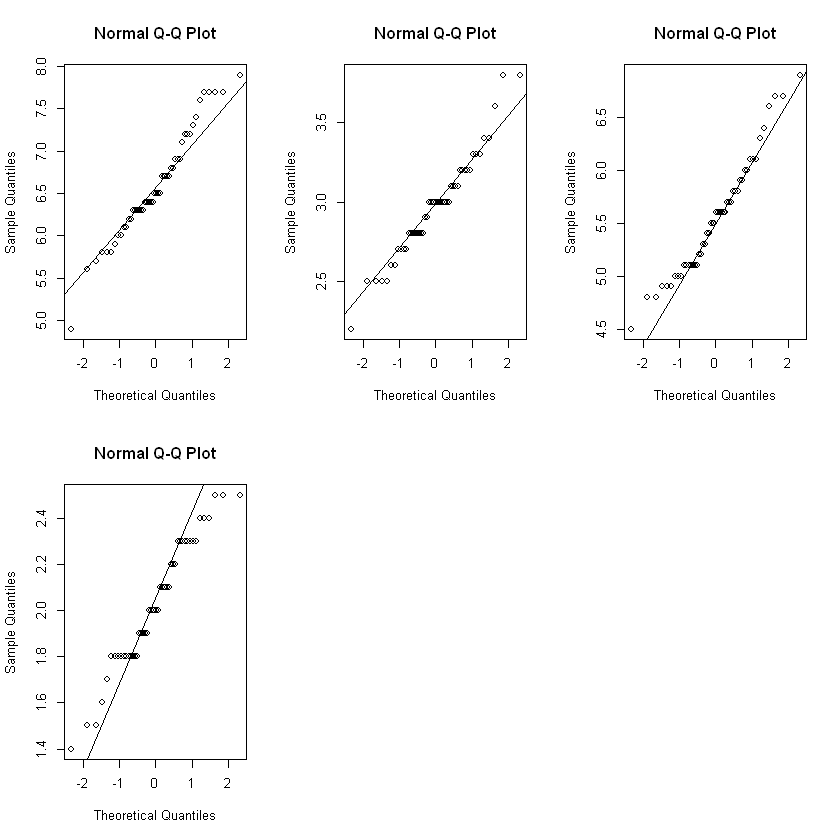

In [4]:
# Análise gráfica do dataset contendo iris-virginica
layout(matrix(c(1,2,3,4,5,6),2,3,3))

qqnorm(dfVirg$Sepal.Length)
qqline(dfVirg$Sepal.Length)

qqnorm(dfVirg$Sepal.Width)
qqline(dfVirg$Sepal.Width)

qqnorm(dfVirg$Petal.Length)
qqline(dfVirg$Petal.Length)

qqnorm(dfVirg$Petal.Width)
qqline(dfVirg$Petal.Width)

layout(1);

### Seguindo os critérios necessários para regressão linear, foram selecionados apenas dados da Espécie "Virginica", por todas as *features* apresentarem distribuição normal segundo teste de Shapiro wilk e por análise gráfica(acima).

,Sepal.Width,Petal.Length,Petal.Width
Sepal.Width,1.0000000,0.4010446,0.5377280
Petal.Length,0.4010446,1.0000000,0.3221082
Petal.Width,0.5377280,0.3221082,1.0000000


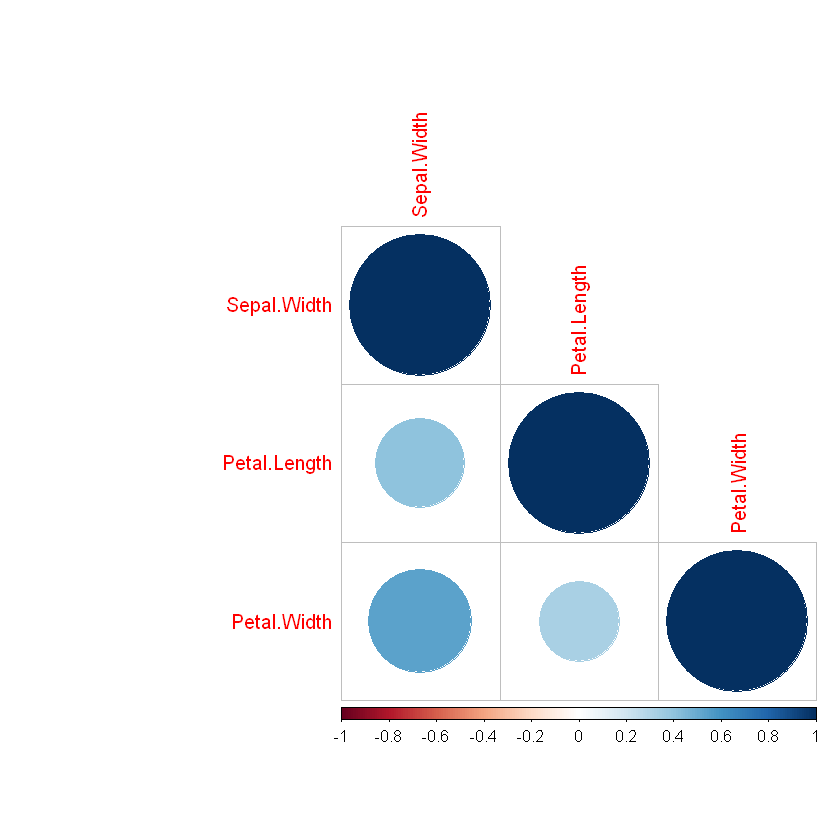

In [5]:
# Análise de correlação das variáveis independentes
correlation <- cor(dfVirg[2:4])
correlation
corrplot(correlation, type="lower")

### Devido a baixa correlação entre as variáveis independentes, as três foram escolhidas para compor o modelo.

In [8]:
#Criar o primeiro modelo com base nos dados e melhores variáveis independentes segundo correlações
#H0=b=0

#Criação do modelo
modelo<-lm(dfVirg$Sepal.Length ~ 
           dfVirg$Petal.Width + 
           dfVirg$Sepal.Width + 
           dfVirg$Petal.Length)

# Resumo do modelo
summary(modelo)

# Teste ANOVA para o modelo
anova(modelo)

# Variance Inflation Factor
vif(modelo)

# Teste de Shapiro-Wilk para normalidade dos Resíduos
shapiro.test(residuals(modelo))

# Durbin watson test(Valor aceitável entre 1.5 e 2.5)
dwtest(modelo)

# H0 = homoscedasticity(Breusch-Pagan test)
bptest(modelo)

modelo


Call:
lm(formula = dfVirg$Sepal.Length ~ dfVirg$Petal.Width + dfVirg$Sepal.Width + 
    dfVirg$Petal.Length)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.7388 -0.2183  0.0148  0.2206  0.7443 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)          0.69988    0.53360   1.312   0.1962    
dfVirg$Petal.Width  -0.16975    0.19807  -0.857   0.3959    
dfVirg$Sepal.Width   0.33034    0.17433   1.895   0.0644 .  
dfVirg$Petal.Length  0.94554    0.09072  10.422 1.07e-13 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.318 on 46 degrees of freedom
Multiple R-squared:  0.7652,	Adjusted R-squared:  0.7499 
F-statistic: 49.98 on 3 and 46 DF,  p-value: 1.622e-14


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
dfVirg$Petal.Width,1,1.565638,1.5656380,15.48249,2.792995e-04
dfVirg$Sepal.Width,1,2.610992,2.6109919,25.81993,6.687302e-06
dfVirg$Petal.Length,1,10.984507,10.9845069,108.62509,1.074269e-13
Residuals,46,4.651663,0.1011231,NA,NA


dfVirg$Petal.Width  dfVirg$Sepal.Width dfVirg$Petal.Length 
           1.434013            1.531560            1.214741


	Shapiro-Wilk normality test

data:  residuals(modelo)
W = 0.99387, p-value = 0.996



	Durbin-Watson test

data:  modelo
DW = 1.8873, p-value = 0.339
alternative hypothesis: true autocorrelation is greater than 0



	studentized Breusch-Pagan test

data:  modelo
BP = 3.6674, df = 3, p-value = 0.2997



Call:
lm(formula = dfVirg$Sepal.Length ~ dfVirg$Petal.Width + dfVirg$Sepal.Width + 
    dfVirg$Petal.Length)

Coefficients:
        (Intercept)   dfVirg$Petal.Width   dfVirg$Sepal.Width  
             0.6999              -0.1698               0.3303  
dfVirg$Petal.Length  
             0.9455  


### R²
A análise do modelo indica que 76,52% do resultado da variável dependênte é explicada pelas variáveis independentes.

### ANOVA 
Segundo teste da ANOVA, a hipótese nula é rejeitada e considera-se betas diferentes de zero do modelo.

### Multicolinearidade
O modelo acima foi criado tendo em consideração as três variáveis independentes do *dataset*. Conforme teste de "*Variance Inflation Factor*", os valores de multicolinearidade são satisfatórios. Com VIF <= 10.

### Normalidade dos Resíduos
Segundo teste shapiro-wilk nos resíduos, a hipótese nula não é rejeitada e há distribuição normal nos resíduos.

### Auto correlação de resíduos
A partir do *DW Test* a hipótese nula não é rejeitada e não existe auto-correlação. Além do valor de DW estar entre 1.5 e 2.5, como valor aceitável.

### Homocedasticidade
O Teste *Breush-Pagan* trás a informação de homocedasticidade. Segundo resultado a hipótese nula não é rejeitada e o modelo não apresenta heterocedasticidade.

### Modelo
Assim o modelo é:

Setal.Length <- 0.6998830 - (Petal.Width \* 0.1697527) + (Setal.Width \* 0.3303370) + (Petal.Length \* 0.9455356)

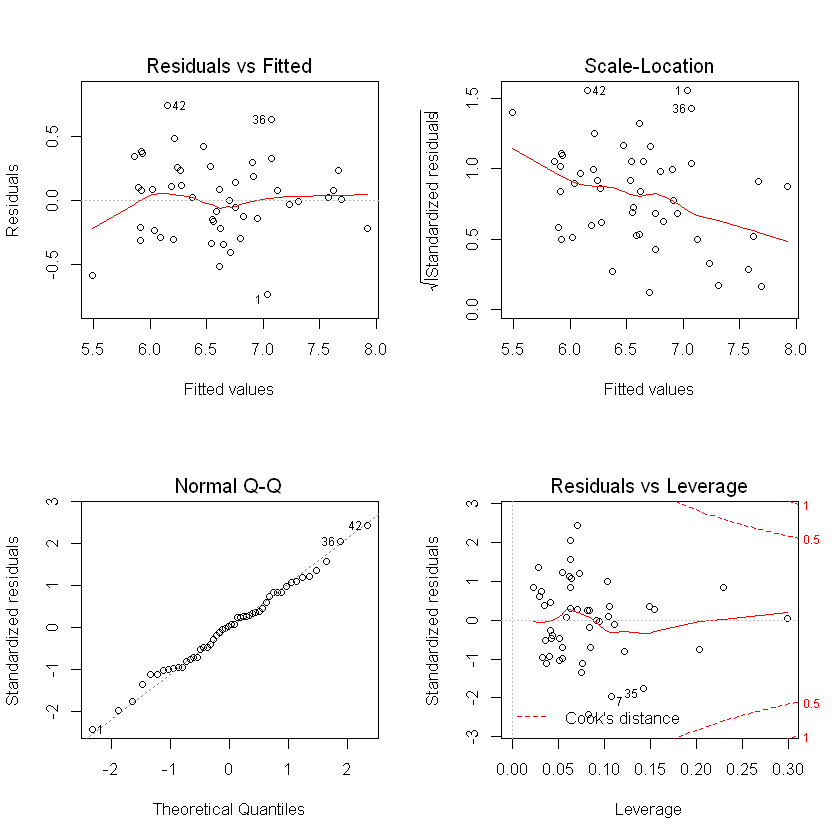

In [7]:
# Plot gráfico do modelo
layout(matrix(c(1,2,3,4),2,2))
plot(modelo);
layout(1);

Segundo análise gráfica acima, o modelo encontra-se dentro dos patrões. Via boxplot do dataset existe um outlier, mas o gráfico "Residuals vs Leverage" mostra que ele não é relevante para alteração do modelo.

"Residual vs Fited" apresenta distribuição ao longo da reta, indicando linearidade.

"Scale Location" determina homocedasticidade.

"Normal QQ" indica distribuição normal dos resíduos.

In [44]:
# Mostra a tabela dos coeficientes da regressão, 
# Std. Error das estimativas dos coeficientes de regressão

COEF=summary(modelo)$coefficients

# Intervalos de Confiança para β0 e β1
IC_betas=confint(modelo)
tab<-cbind(COEF,IC_betas)
rownames(tab)<-c("β0","β1(Petal.Width)","β2(Setal.Width)","β3(Petal.Length)")
tab

,Estimate,Std. Error,t value,Pr(>|t|),2.5 %,97.5 %
ß0,0.6998830,0.53360089,1.3116227,1.961563e-01,-0.37419983,1.7739659
ß1(Petal.Width),-0.1697527,0.19807243,-0.8570233,3.958750e-01,-0.56845180,0.2289464
ß2(Setal.Width),0.3303370,0.17432873,1.8949086,6.439972e-02,-0.02056852,0.6812426
ß3(Petal.Length),0.9455356,0.09072204,10.4223360,1.074269e-13,0.76292159,1.1281496


In [85]:
# Teste simples do modelo
Setal.Width <- 3
Petal.Length <- 6.6
Petal.Width <- 2.1


Setal.Length <- 0.6998830 -(Petal.Width*0.1697527) + (Setal.Width*0.3303370) + (Petal.Length*0.9455356)
Setal.Length



[1] 7.574948

In [45]:
head(dfVirg)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
101,6.3,3.3,6.0,2.5,virginica
102,5.8,2.7,5.1,1.9,virginica
103,7.1,3.0,5.9,2.1,virginica
104,6.3,2.9,5.6,1.8,virginica
105,6.5,3.0,5.8,2.2,virginica
106,7.6,3.0,6.6,2.1,virginica


In [84]:
# Análise do stepAIC
# Análise via stepAIC não apresentou melhora no modelo
require(MASS)

print("Both")
summary(stepAIC(modelo, direction = 'both'))

print("Forward")
summary(stepAIC(modelo, direction = 'forward'))

print("Backward")
summary(stepAIC(modelo, direction = 'backward'))

[1] "Both"
Start:  AIC=-110.74
dfVirg$Sepal.Length ~ dfVirg$Petal.Width + dfVirg$Sepal.Width + 
    dfVirg$Petal.Length

                      Df Sum of Sq     RSS      AIC
- dfVirg$Petal.Width   1    0.0743  4.7259 -111.948
<none>                              4.6517 -110.740
- dfVirg$Sepal.Width   1    0.3631  5.0148 -108.982
- dfVirg$Petal.Length  1   10.9845 15.6362  -52.122

Step:  AIC=-111.95
dfVirg$Sepal.Length ~ dfVirg$Sepal.Width + dfVirg$Petal.Length

                      Df Sum of Sq     RSS      AIC
<none>                              4.7259 -111.948
- dfVirg$Sepal.Width   1    0.2890  5.0149 -110.980
+ dfVirg$Petal.Width   1    0.0743  4.6517 -110.740
- dfVirg$Petal.Length  1   10.9449 15.6708  -54.011



Call:
lm(formula = dfVirg$Sepal.Length ~ dfVirg$Sepal.Width + dfVirg$Petal.Length)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.79154 -0.23348  0.01447  0.22070  0.70178 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)           0.6248     0.5249   1.190   0.2399    
dfVirg$Sepal.Width    0.2600     0.1533   1.695   0.0966 .  
dfVirg$Petal.Length   0.9348     0.0896  10.433 8.01e-14 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3171 on 47 degrees of freedom
Multiple R-squared:  0.7615,	Adjusted R-squared:  0.7513 
F-statistic: 75.02 on 2 and 47 DF,  p-value: 2.356e-15


[1] "Forward"
Start:  AIC=-110.74
dfVirg$Sepal.Length ~ dfVirg$Petal.Width + dfVirg$Sepal.Width + 
    dfVirg$Petal.Length




Call:
lm(formula = dfVirg$Sepal.Length ~ dfVirg$Petal.Width + dfVirg$Sepal.Width + 
    dfVirg$Petal.Length)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.7388 -0.2183  0.0148  0.2206  0.7443 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)          0.69988    0.53360   1.312   0.1962    
dfVirg$Petal.Width  -0.16975    0.19807  -0.857   0.3959    
dfVirg$Sepal.Width   0.33034    0.17433   1.895   0.0644 .  
dfVirg$Petal.Length  0.94554    0.09072  10.422 1.07e-13 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.318 on 46 degrees of freedom
Multiple R-squared:  0.7652,	Adjusted R-squared:  0.7499 
F-statistic: 49.98 on 3 and 46 DF,  p-value: 1.622e-14


[1] "Backward"
Start:  AIC=-110.74
dfVirg$Sepal.Length ~ dfVirg$Petal.Width + dfVirg$Sepal.Width + 
    dfVirg$Petal.Length

                      Df Sum of Sq     RSS      AIC
- dfVirg$Petal.Width   1    0.0743  4.7259 -111.948
<none>                              4.6517 -110.740
- dfVirg$Sepal.Width   1    0.3631  5.0148 -108.982
- dfVirg$Petal.Length  1   10.9845 15.6362  -52.122

Step:  AIC=-111.95
dfVirg$Sepal.Length ~ dfVirg$Sepal.Width + dfVirg$Petal.Length

                      Df Sum of Sq     RSS      AIC
<none>                              4.7259 -111.948
- dfVirg$Sepal.Width   1     0.289  5.0149 -110.980
- dfVirg$Petal.Length  1    10.945 15.6708  -54.011



Call:
lm(formula = dfVirg$Sepal.Length ~ dfVirg$Sepal.Width + dfVirg$Petal.Length)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.79154 -0.23348  0.01447  0.22070  0.70178 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)           0.6248     0.5249   1.190   0.2399    
dfVirg$Sepal.Width    0.2600     0.1533   1.695   0.0966 .  
dfVirg$Petal.Length   0.9348     0.0896  10.433 8.01e-14 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3171 on 47 degrees of freedom
Multiple R-squared:  0.7615,	Adjusted R-squared:  0.7513 
F-statistic: 75.02 on 2 and 47 DF,  p-value: 2.356e-15



Call:
C5.0.default(x = input, y = output, control = C5.0Control(noGlobalPruning
 = TRUE, minCases = 1))


C5.0 [Release 2.07 GPL Edition]  	Tue Jun 16 22:13:42 2020
-------------------------------

Class specified by attribute `outcome'

Read 150 cases (5 attributes) from undefined.data

Decision tree:

Petal.Length <= 1.9: setosa (50)
Petal.Length > 1.9:
:...Petal.Width > 1.7: virginica (46/1)
    Petal.Width <= 1.7:
    :...Petal.Length <= 4.9: versicolor (48/1)
        Petal.Length > 4.9:
        :...Petal.Width <= 1.5: virginica (3)
            Petal.Width > 1.5:
            :...Petal.Length <= 5.4: versicolor (2)
                Petal.Length > 5.4: virginica (1)


Evaluation on training data (150 cases):

	    Decision Tree   
	  ----------------  
	  Size      Errors  

	     6    2( 1.3%)   <<


	   (a)   (b)   (c)    <-classified as
	  ----  ----  ----
	    50                (a): class setosa
	          49     1    (b): class versicolor
	           1    49    (c): class virgin

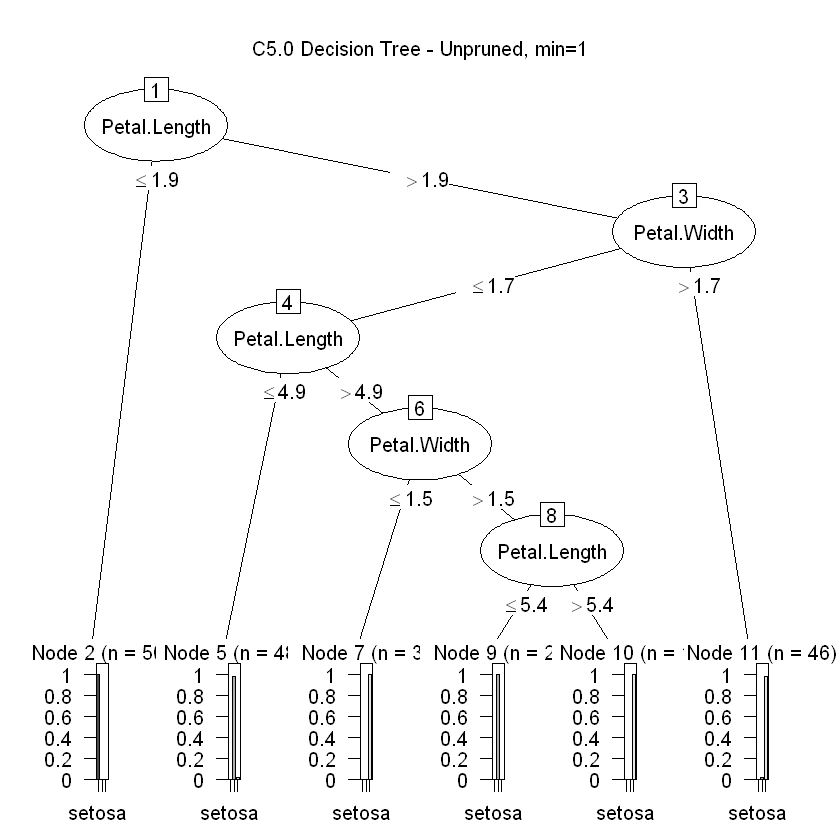

In [87]:
# Análise extra - Árvore de decisão
library(C50)
input <- df[,1:4]

output <- df[,5]
model1 <- C5.0(input, output, control = C5.0Control(noGlobalPruning = TRUE,minCases=1))
plot(model1, main="C5.0 Decision Tree - Unpruned, min=1")
summary(model1)

In [1]:
?iris

In [2]:
?lm